# 𓆩 Content 𓆪

Import librarries for Analyse the Data

Read dataset

Get information about data

Data cleaning

Data visualization - getting insights

Import librarries Of Machine Learning

Data preprocessing

Build Machine Learning Models

Final Result

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [3]:
df = pd.read_csv(r'C:\Users\Shiva\Downloads\FSDS---srinu\kaggle,linkedin\Diamonds Prices2022.csv\Diamonds Prices2022.csv')

# Get information about data

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

# ⟡ Rename columns

In [7]:
df = df.drop('Unnamed: 0',axis=1)
df.columns = ['Weight', 'Cut_Quality', 'Color', 'Clarity', 'Depth', 'Table',
        'Price', 'X_length', 'Y_width', 'Z_Depth']

In [8]:
df['Cut_Quality'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: Cut_Quality, dtype: int64

○ Fair ➡ Good ➡ Very Good ➡ Premium ➡ Ideal [from worst to greatest]

In [9]:
df['Color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: Color, dtype: int64

○ J ➡ I ➡ H ➡ G ➡ F ➡ E ➡ D [from worst to greatest]

In [10]:
df['Clarity'].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: Clarity, dtype: int64

○ I1 ➡ SI2 ➡ SI1 ➡ VS2 ➡ VS1 ➡ VVS2 ➡ VVS1 ➡ IF [from worst to greatest]

In [11]:
df.describe()

,Weight,Depth,Table,Price,X_length,Y_width,Z_Depth
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data Cleaning

# ⟡ Remove Duplicates

In [12]:
df[df.duplicated()]

,Weight,Cut_Quality,Color,Clarity,Depth,Table,Price,X_length,Y_width,Z_Depth
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [13]:
df.drop_duplicates(inplace=True)

↪ Duplicated data removed

# ⟡ Null data handling

In [14]:
df.isnull().sum()

Weight         0
Cut_Quality    0
Color          0
Clarity        0
Depth          0
Table          0
Price          0
X_length       0
Y_width        0
Z_Depth        0
dtype: int64

↪ No null data

# ⟡[ Detect - Remove] Outliers

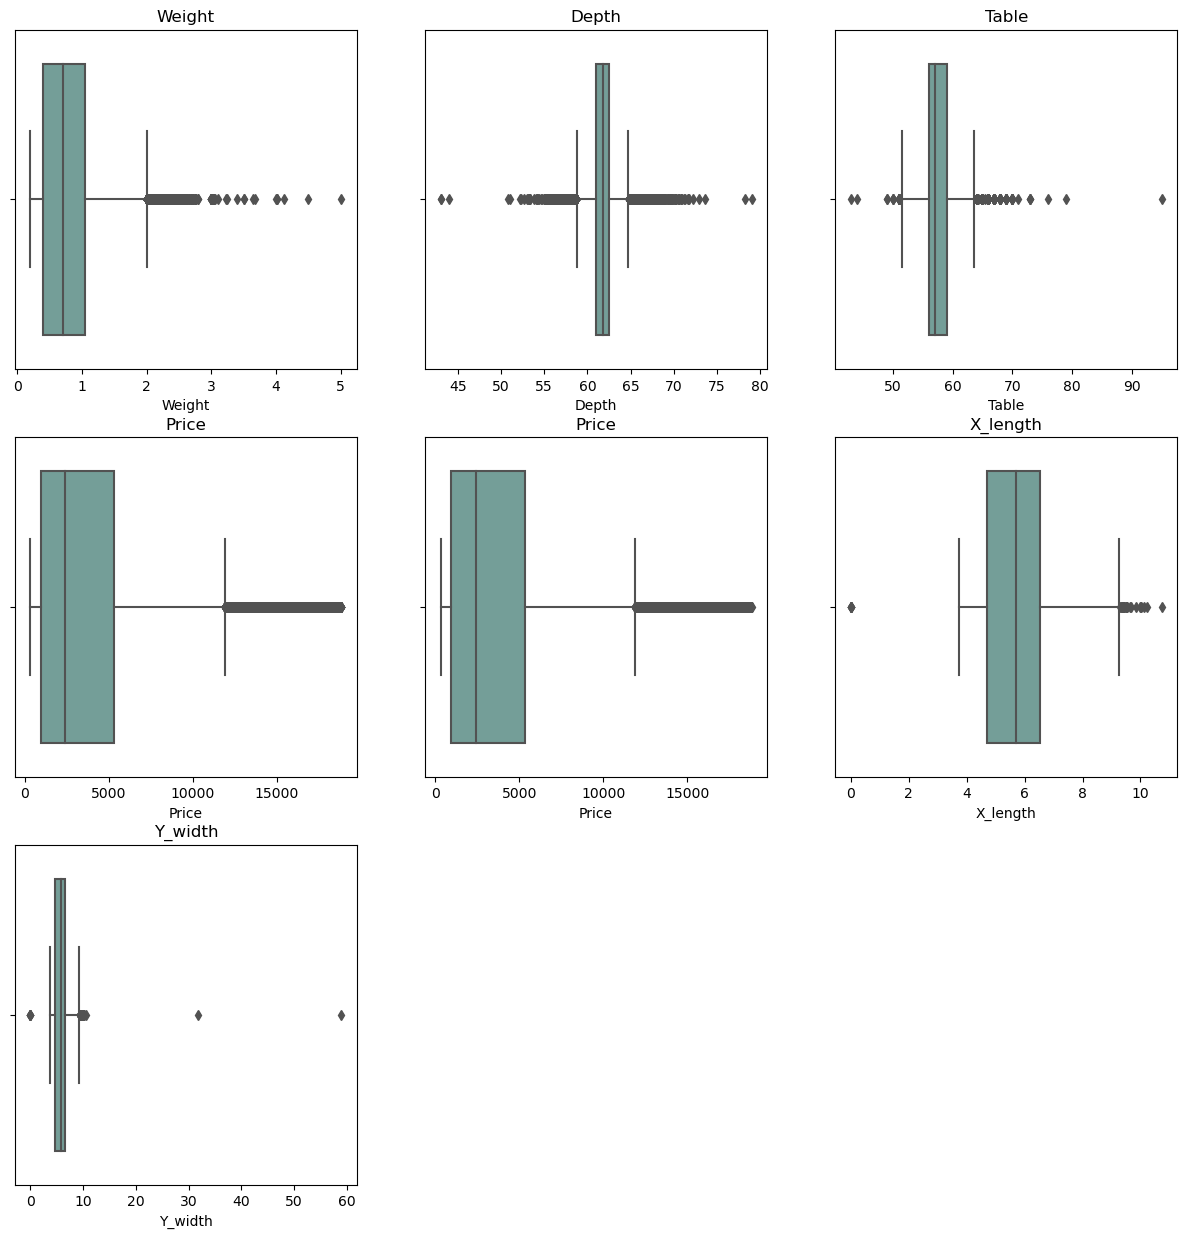

In [17]:
numeric_cols = ['Weight', 'Depth', 'Table', 'Price', 'Price', 'X_length',
               'Y_width', 'Z_Depth']
plt.figure(figsize=(15, 15))
for i in range(7):
    plt.subplot(3,3,i+1)
    
    sns.boxplot(x=df[numeric_cols[i]],color='#6DA59D')
    plt.title(numeric_cols[i])
    
plt.show()    

In [18]:
def detect_outliers(data,column):
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 = (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = df.index[(df[column] <lower_bound) | (df[column] > upper_bound)]
    
    return ls

In [20]:
index_list = []

for column in numeric_cols:
    index_list.extend(detect_outliers(df,column))
    
# remove duplicated indices in the index_list and sort it 
index_list = sorted(set(index_list))

In [22]:
before_remove = df.shape

df = df.drop(index_list)
after_remove = df.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (53794, 10)
Shape of data after remove : (6272, 10)


↪ Outliers Detected and Removed

# Data visualization - getting insights

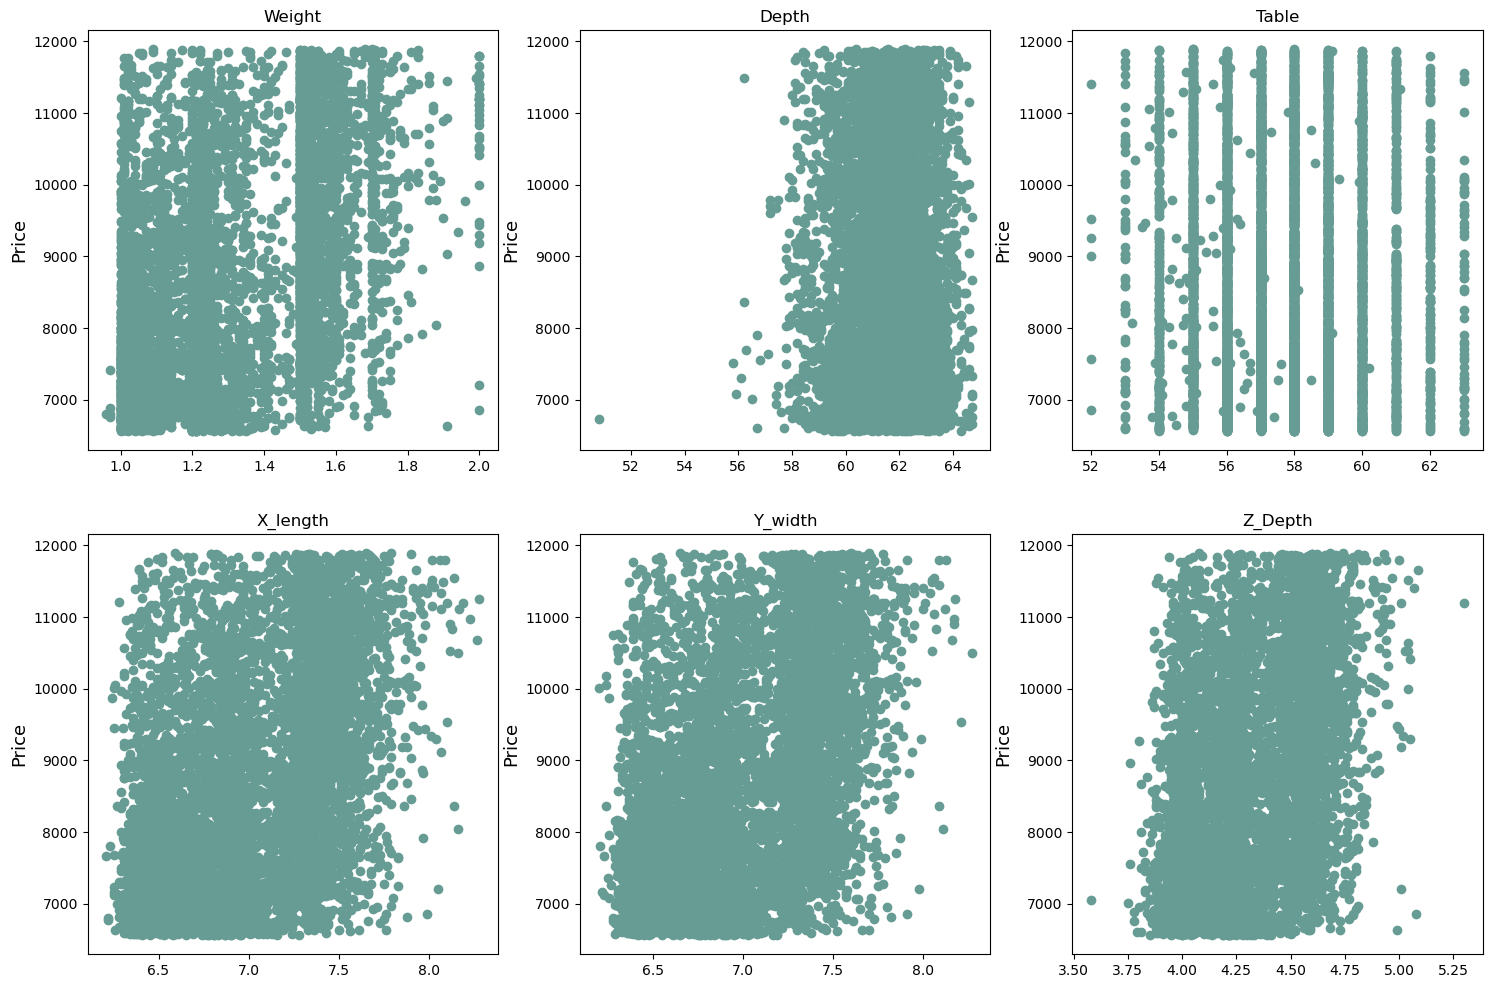

In [23]:
cols = ['Weight', 'Depth', 'Table', 'X_length', 'Y_width', 'Z_Depth',]
plt.figure(figsize=(18, 12))
for i in range(6):
    plt.subplot(2,3,i+1)
    #sns.set()
    plt.scatter(df[cols[i]],df['Price'],color='#679C94')
    plt.title(cols[i])
    plt.ylabel('Price',size=13)
plt.show()    

↪ We can see the relation between this Features and the Price

In [24]:
quality = df.groupby('Cut_Quality').mean().sort_values('Price',ascending=False)
quality = quality[['Price']].round(2)
quality.reset_index(inplace=True)
quality

,Cut_Quality,Price
0,Ideal,8800.27
1,Premium,8794.15
2,Very Good,8686.61
3,Good,8533.45
4,Fair,8296.53


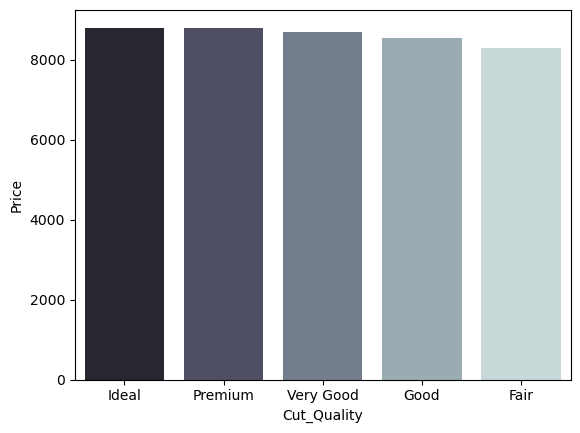

In [25]:
sns.barplot(x = quality['Cut_Quality'],y=quality['Price'], palette='bone')
plt.show()

↪ We see the average Price for every cut quality

In [26]:
color = df.groupby('Color').mean().sort_values('Price',ascending=False)
color = color[['Price']].round(2)
color.reset_index(inplace=True)
color

,Color,Price
0,I,8950.53
1,D,8897.56
2,E,8830.38
3,F,8824.05
4,H,8766.83
5,G,8604.04
6,J,8384.49


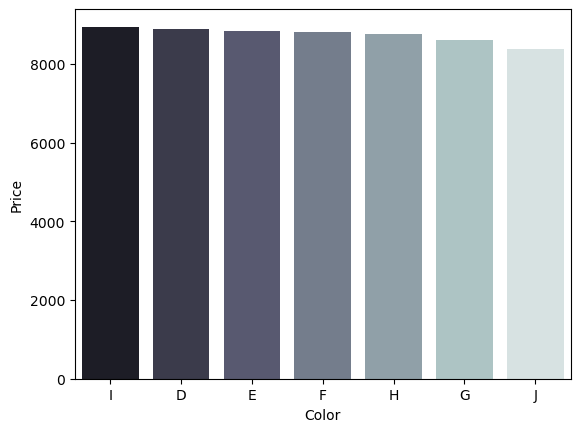

In [29]:
sns.barplot(x=color['Color'],y=color['Price'], palette='bone')
plt.show()

↪ We see the average Price for each Color

In [30]:
clarity = df.groupby('Clarity').mean().sort_values('Price',ascending=False)

clarity = clarity[['Price']].round(2)
clarity.reset_index(inplace=True)
clarity

,Clarity,Price
0,IF,9641.18
1,VVS1,9589.56
2,VVS2,9215.58
3,SI1,8957.43
4,SI2,8667.77
5,VS1,8530.59
6,VS2,8380.18
7,I1,7516.43


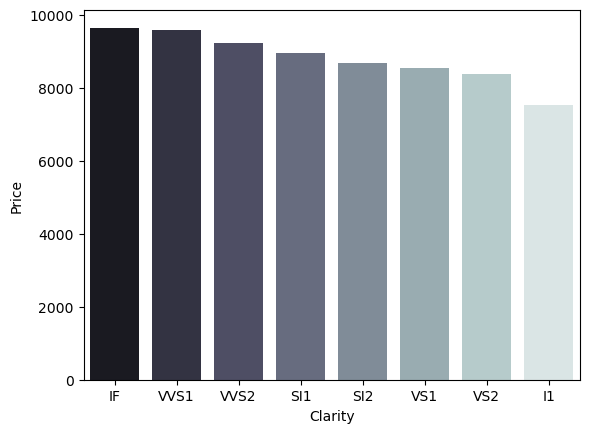

In [31]:
sns.barplot(x=clarity['Clarity'],y=clarity['Price'], palette='bone')
plt.show()

↪ We see the average Price for every Clarity degree

<Axes: >

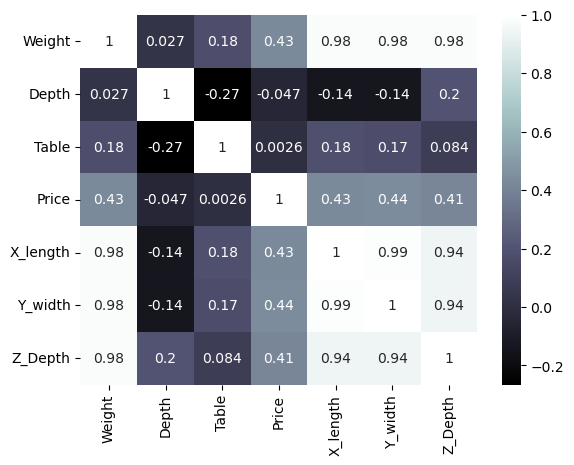

In [32]:
sns.heatmap(df.corr(),annot=True,cmap='bone')

↪ There is a week relation between [Depth - Table ]features and the Price which effect negatively on our model performance

# Import librarries Of Machine Learning

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Data preprocessing

# ⟡ Ordinary Encoding

In [37]:
df['Cut_Quality'] = df['Cut_Quality'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})

df['Color'] = df['Color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5,'D':6})

df['Claity'] = df['Clarity'].map({'I1':0, 'SI2':1, 'SI':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

↪ Data encoded ordinarily from worst to greatest

# ⟡ Split Data [features - target]

In [40]:
x=df[['Weight', 'Cut_Quality', 'Color', 'Claity', 'X_length', 'Y_width', 'Z_Depth']]
y=df[['Price']]

# ⟡ Scaling Features

In [42]:
scaler = StandardScaler()
x=scaler.fit_transform(x)

# ⟡ Split Data [train - test]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,shuffle=True)

# Build Machine Learning Models

# ⟡ Linear Regression Model

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create and fit the LinearRegression model on the imputed data
model = LinearRegression()
model.fit(x_train_imputed, y_train)


LinearRegression()

In [49]:
# Impute missing values in the test data using the same imputer
x_test_imputed = imputer.transform(x_test)

# Make predictions on the imputed test data
y_pred = model.predict(x_test_imputed)


In [54]:
from sklearn.metrics import r2_score

# Fit the model on the imputed training data
model.fit(x_train_imputed, y_train)

# Make predictions on the imputed training data
y_train_pred = model.predict(x_train_imputed)

# Make predictions on the imputed test data
y_test_pred = model.predict(x_test_imputed)

# Calculate and print the train and test accuracy scores
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

print(f"The train accuracy: {train_accuracy}")
print(f"The test accuracy: {test_accuracy}")


The train accuracy: 0.626308864512723
The test accuracy: 0.6233307314600166


# ⟡ Ridge Regression Model

In [53]:
# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create and fit the LinearRegression model on the imputed data
model = Ridge()
model.fit(x_train_imputed, y_train)

Ridge()

In [65]:
# Impute missing values in the test data using the same imputer
x_test_imputed = imputer.transform(x_test)

# Make predictions on the imputed test data
y_pred = model.predict(x_test_imputed)

In [64]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Impute missing values in x_train
x_train_imputed = imputer.fit_transform(x_train)

# Create an instance of the Ridge model
r_model = Ridge()

# Fit the Ridge model on the imputed training data
r_model.fit(x_train_imputed, y_train)

# Impute missing values in x_test
x_test_imputed = imputer.transform(x_test)

# Make predictions on the training data
y_train_pred = r_model.predict(x_train_imputed)

# Make predictions on the test data
y_test_pred = r_model.predict(x_test_imputed)

# Calculate and print the train and test accuracy scores
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

print(f"The train accuracy: {train_accuracy}")
print(f"The test accuracy: {test_accuracy}")


The train accuracy: 0.626308864512723
The test accuracy: 0.6233307314600166


# ⟡ Lasso Regression Model

In [67]:
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Impute missing values in x_train
x_train_imputed = imputer.fit_transform(x_train)

# Create an instance of the Ridge model
r_model = Lasso()

# Fit the Ridge model on the imputed training data
r_model.fit(x_train_imputed, y_train)

# Impute missing values in x_test
x_test_imputed = imputer.transform(x_test)

# Make predictions on the training data
y_train_pred = r_model.predict(x_train_imputed)

# Make predictions on the test data
y_test_pred = r_model.predict(x_test_imputed)

# Calculate and print the train and test accuracy scores
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

print(f"The train accuracy: {train_accuracy}")
print(f"The test accuracy: {test_accuracy}")


The train accuracy: 0.6261931396078413
The test accuracy: 0.6232895231982175


# ⟡ Polynomial Regression Model

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Impute missing values in x_train
x_train_imputed = imputer.fit_transform(x_train)

# Create an instance of the PolynomialFeatures class
poly_features = PolynomialFeatures(degree=2)

# Generate polynomial features from the imputed training data
x_train_poly = poly_features.fit_transform(x_train_imputed)

# Create an instance of the Ridge model
r_model = Ridge()

# Fit the Ridge model on the polynomial training data
r_model.fit(x_train_poly, y_train)

# Impute missing values in x_test
x_test_imputed = imputer.transform(x_test)

# Generate polynomial features from the imputed test data
x_test_poly = poly_features.transform(x_test_imputed)

# Make predictions on the training data
y_train_pred = r_model.predict(x_train_poly)

# Make predictions on the test data
y_test_pred = r_model.predict(x_test_poly)

# Calculate and print the train and test accuracy scores
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

print(f"The train accuracy: {train_accuracy}")
print(f"The test accuracy: {test_accuracy}")


The train accuracy: 0.6985525158014525
The test accuracy: 0.6714264259680074


# ⟡ Random Forest Regession Model

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the SimpleImputer class to impute the missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both the training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create an instance of the RandomForestRegressor model and fit it on the imputed data
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train_imputed, y_train)

# Calculate the predictions for the training and test datasets
y_train_pred = random_forest.predict(x_train_imputed)
y_test_pred = random_forest.predict(x_test_imputed)

# Calculate the RMSE and R-squared for the training dataset
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print("Training RMSE:", train_rmse)
print("Training R-squared:", train_r2)

# Calculate the RMSE and R-squared for the test dataset
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)


Training RMSE: 258.37696449790195
Training R-squared: 0.9709725122889077
Test RMSE: 680.731246087953
Test R-squared: 0.792328868671744


# ⟡ Apply Cross Validation on Linear Regression

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create an instance of the SimpleImputer class to impute the missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both the training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create an instance of the RandomForestRegressor model and fit it on the imputed data
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train_imputed, y_train)

# Calculate the predictions for the training and test datasets
y_train_pred = random_forest.predict(x_train_imputed)
y_test_pred = random_forest.predict(x_test_imputed)

# Calculate the RMSE and R-squared for the training dataset
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print("Training RMSE:", train_rmse)
print("Training R-squared:", train_r2)

# Calculate the RMSE and R-squared for the test dataset
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)

# Perform cross-validation using LinearRegression
scores = cross_val_score(LinearRegression(), x_train_imputed, y_train, cv=6)
print('The accuracy of cross-validation applying on the regression model:', scores.mean())


Training RMSE: 255.6566204109993
Training R-squared: 0.9715805313598118
Test RMSE: 674.5738416469633
Test R-squared: 0.796068764513515
The accuracy of cross-validation applying on the regression model: 0.6244317714400712


# Final Result

⟡ Machine Learning Models Used in Project

Linear Regression

Ridge Regression

Lasso Regression

Polynomial Regression

Random Forest Regression

⟡ Techniques Used To Improve Model Performance

Standard Scaller

Ordinary Encoding

Cross Validation

# 𓆩 Finally We Achieved [.79] Model Accuracy for Our Model 𓆪

# Thanks For Reading 𓆩♡𓆪